In [168]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('ggplot')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(16,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title(f'{feature} Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1, bins=50, fit=stats.norm, color = '#2166ac', hist_kws=dict(alpha=0.5), kde_kws=dict(linewidth=3))
    ax1.legend(labels=['target','normal'])

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)
    ax2.get_lines()[0].set_color('#2166ac')
    ax2.get_lines()[1].set_color('#b2182b')
    ax2.get_lines()[1].set_linewidth(3.0)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(y = df.loc[:,feature], ax = ax3, orient="v", color = '#2166ac', linewidth = 3, whiskerprops=dict(color="black"));
    

In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')

In [3]:
path='/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/test.csv
/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/train.csv
/Users/irak/Documents/py_viz/tabular-playground-series-jan-2021/sample_submission.csv


In [4]:
train = pd.read_csv(path+'train.csv', sep=',', index_col='id')
sample_submission=pd.read_csv(path+'sample_submission.csv', sep=',', index_col='id')
test = pd.read_csv(path+'test.csv', sep=',', index_col='id')

print('train data')
display(train.head())

train data


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


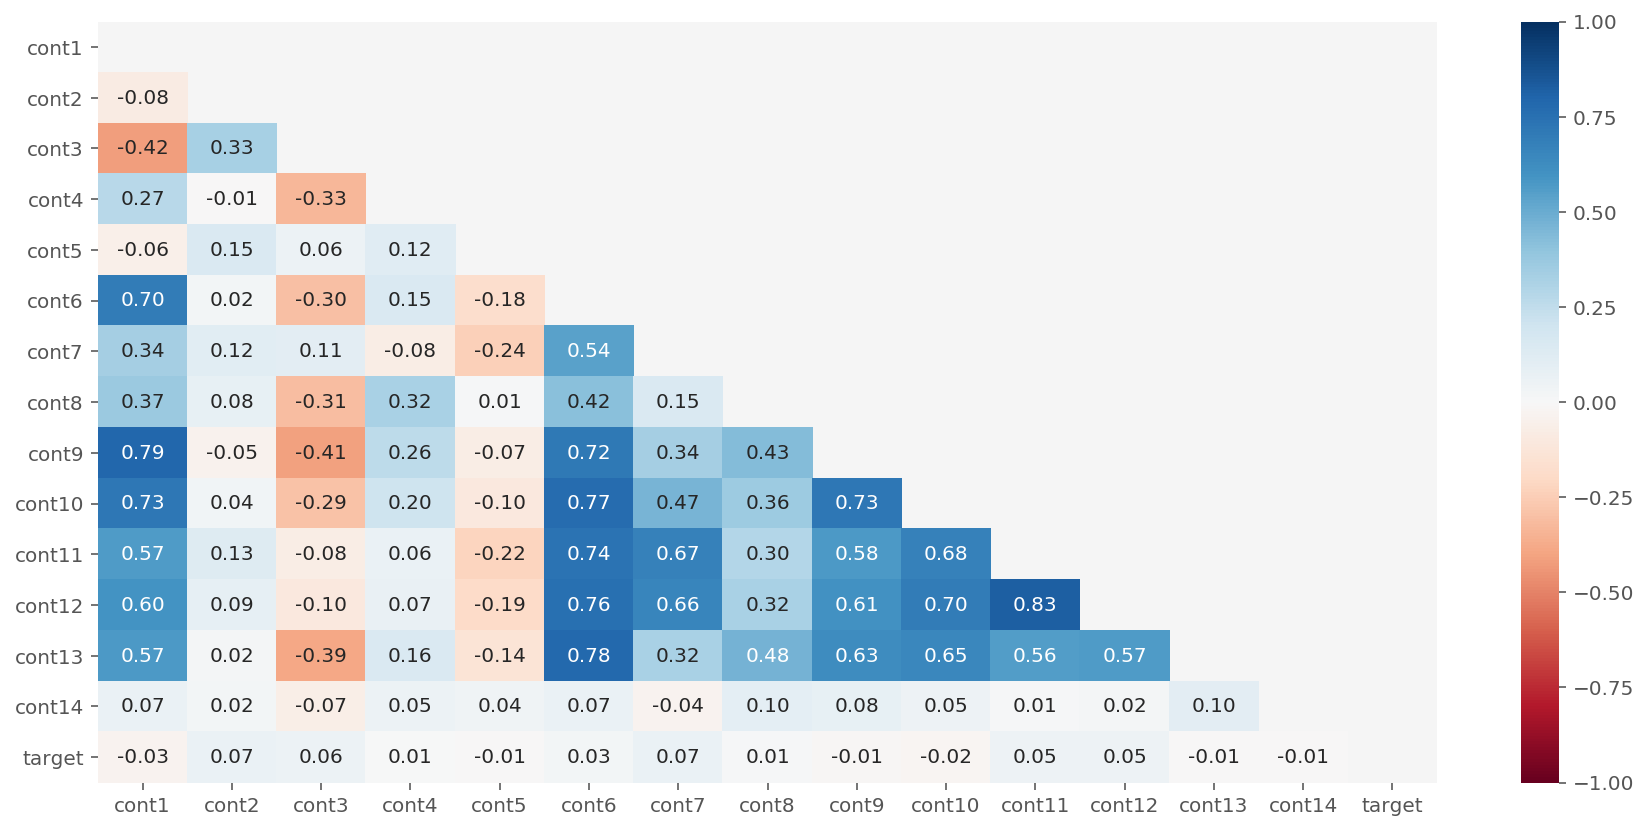

In [106]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 7))
ax = sns.heatmap(corr, cmap="RdBu", mask = mask, vmin=-1, vmax = 1, center = 0, annot=True, fmt='.2f')
ax.set_facecolor("whitesmoke")

Распределение зависимой переменной

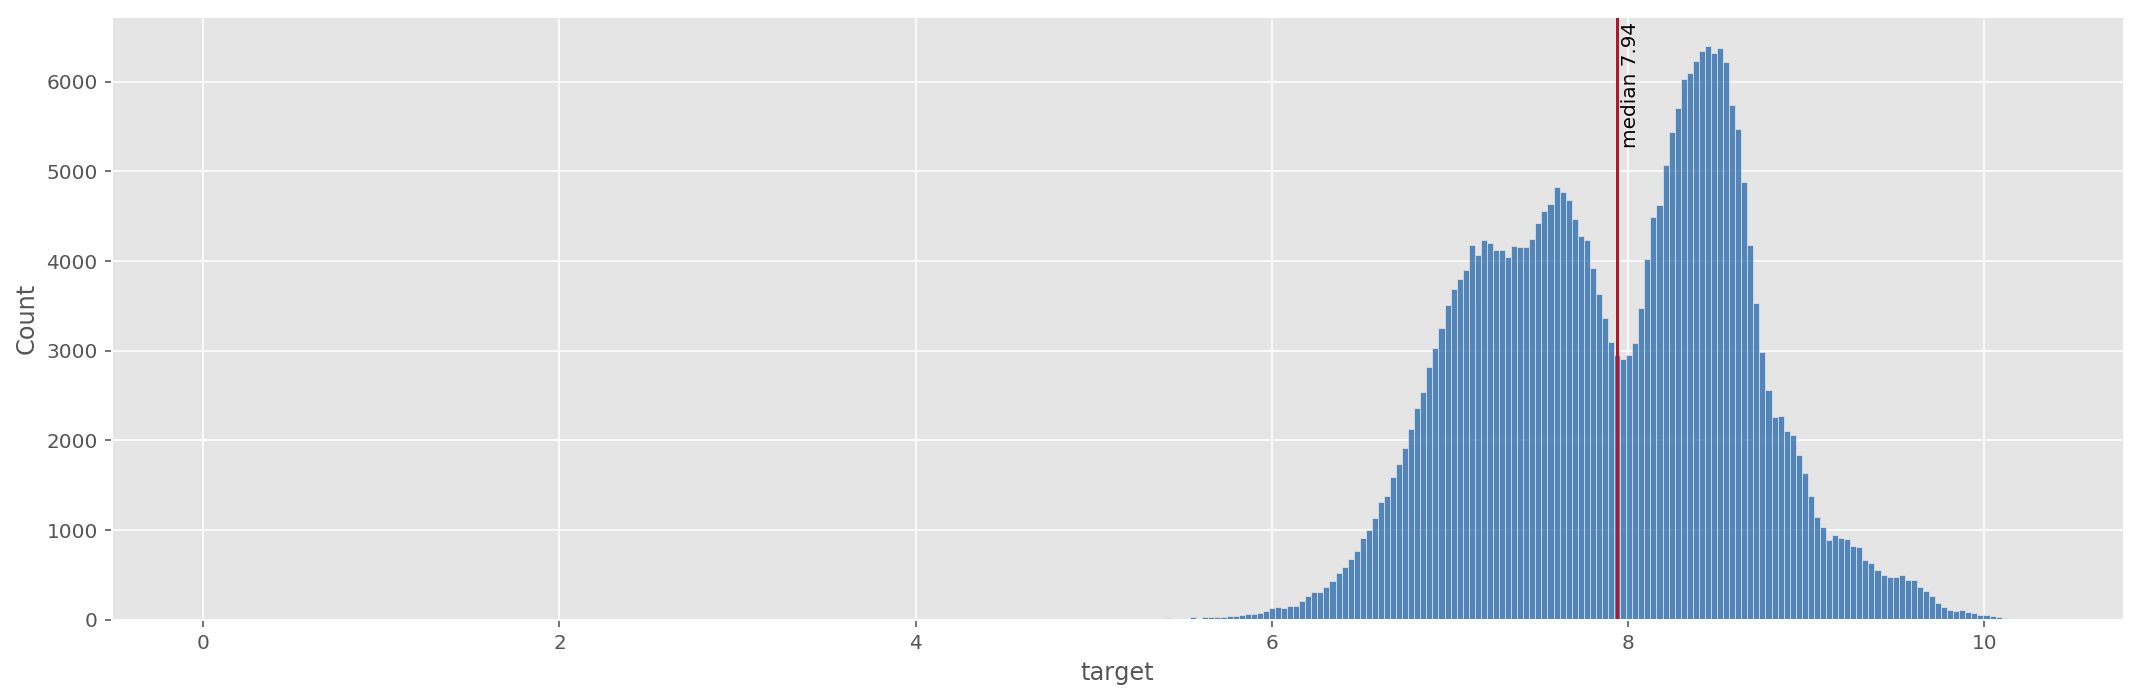

In [241]:
ax = sns.displot(data=train['target'], height=5, aspect=3, color = '#2166ac')
plt.axvline(train['target'].median(), 0, color="#b2182b")
lab = plt.text(train['target'].median() + 0.02 ,6500,'median 7.94', rotation=90)

Подробнее

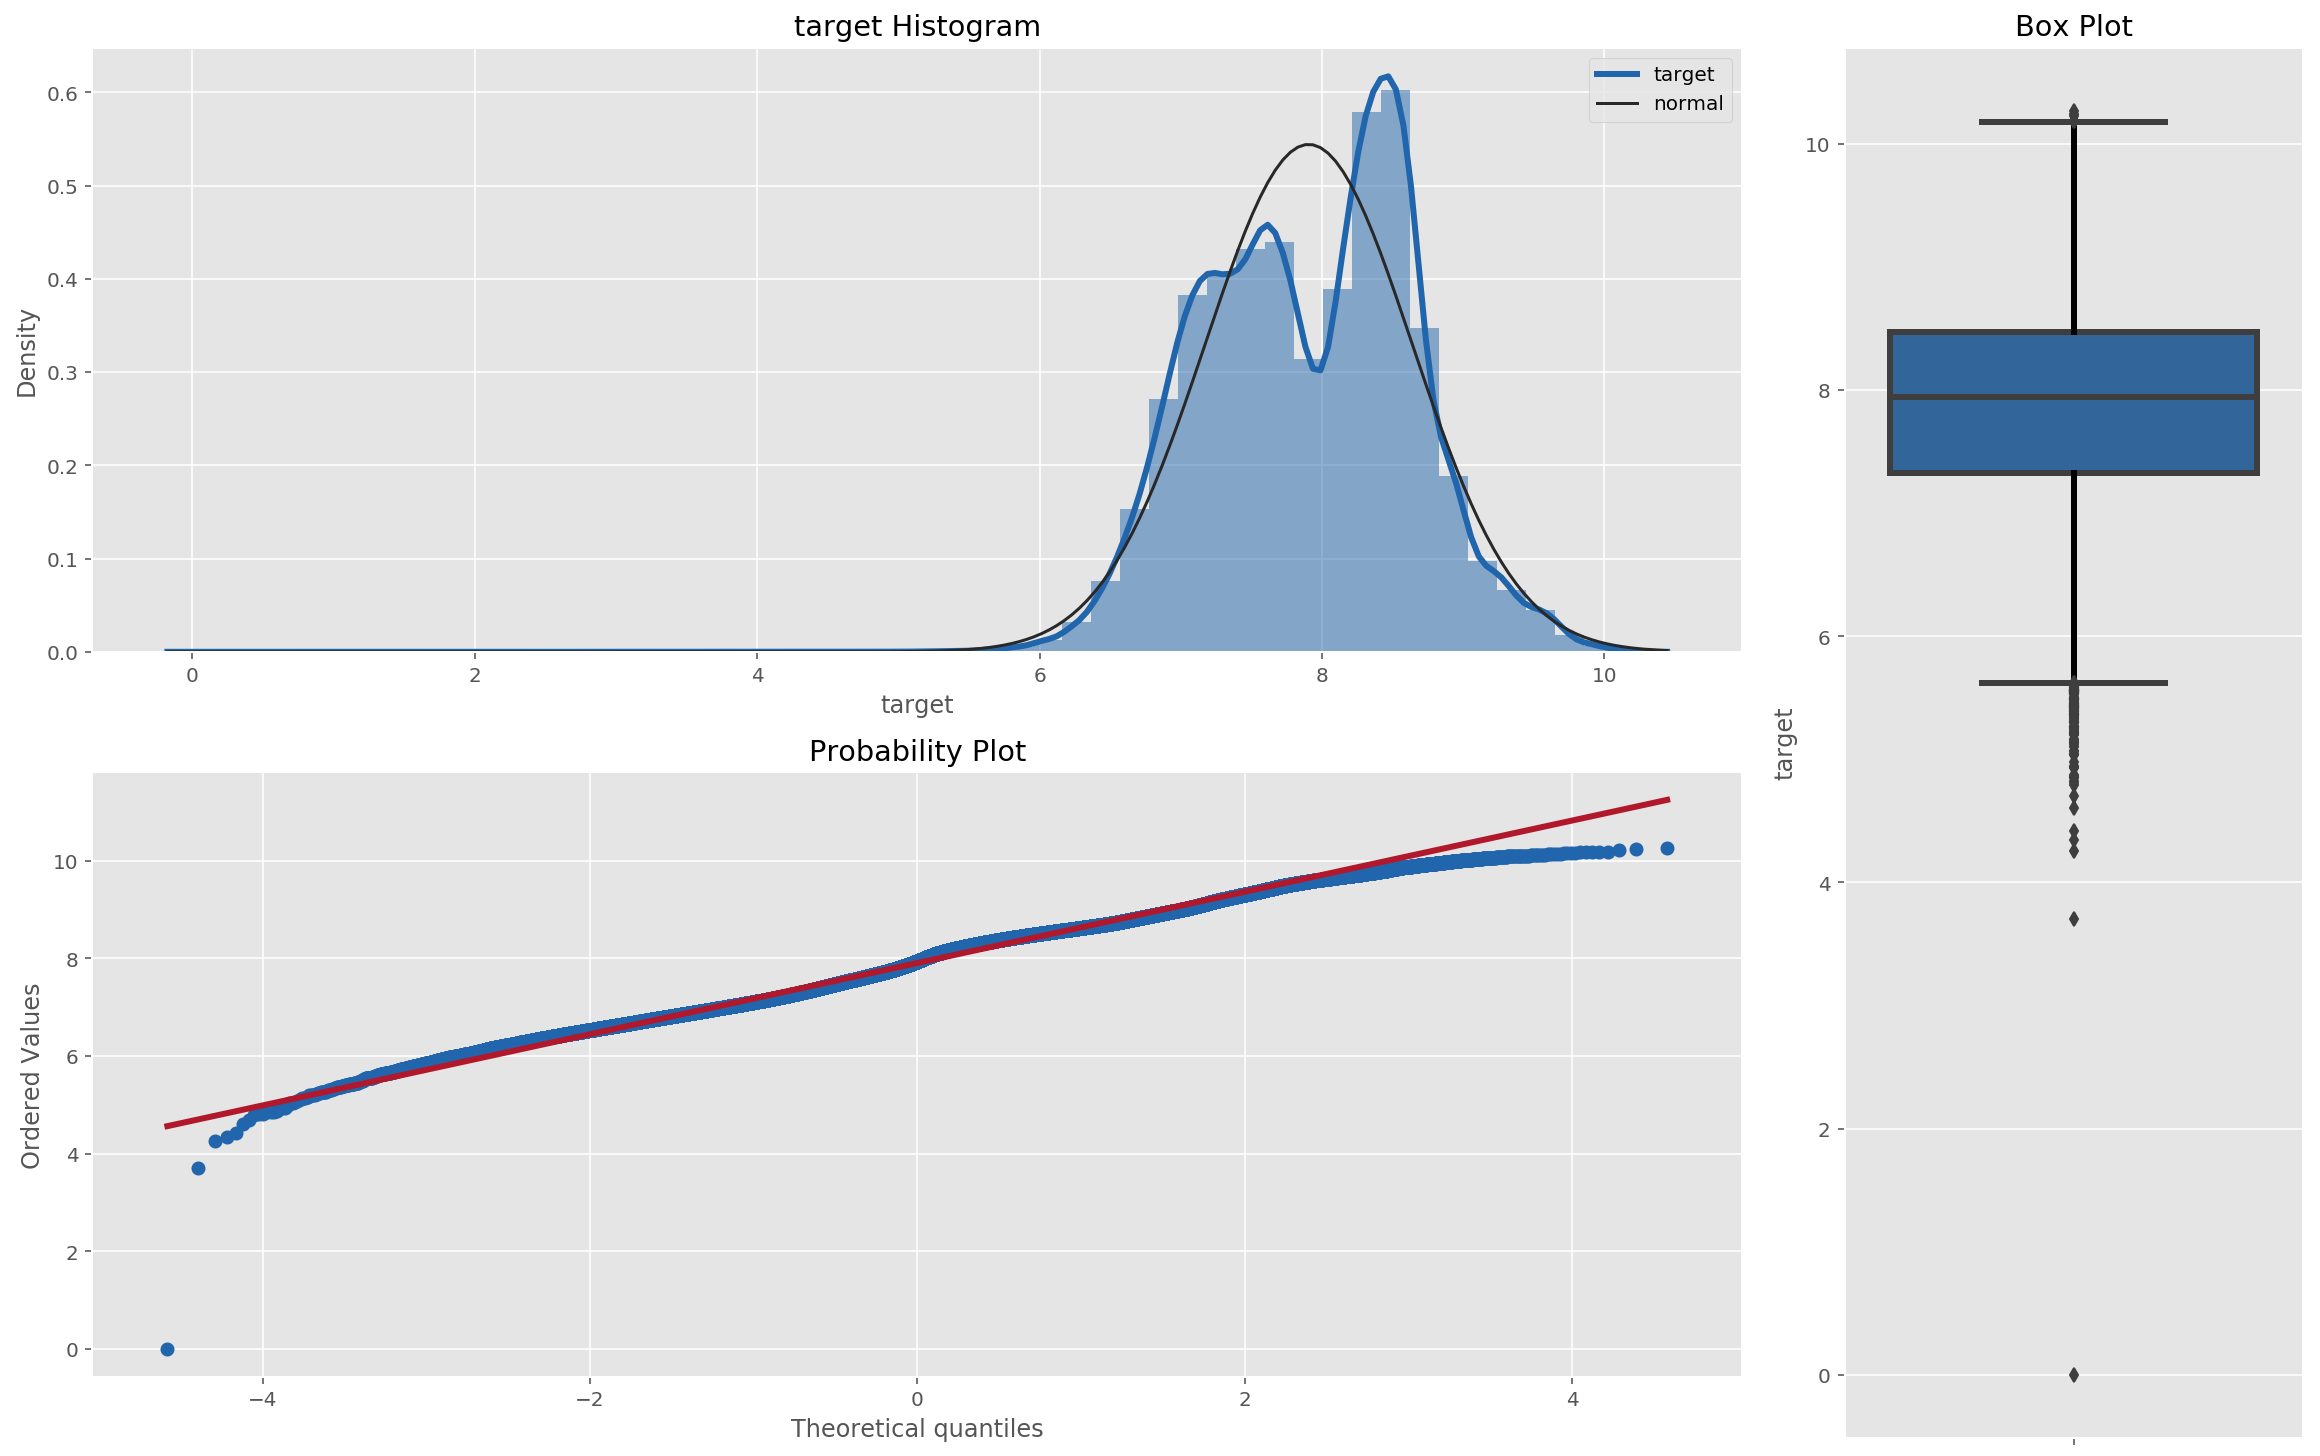

In [169]:
plotting_3_chart(train, 'target') # source https://goldinlocks.github.io/linear_regression_intro/

Посмотрим на все переменные одновременно

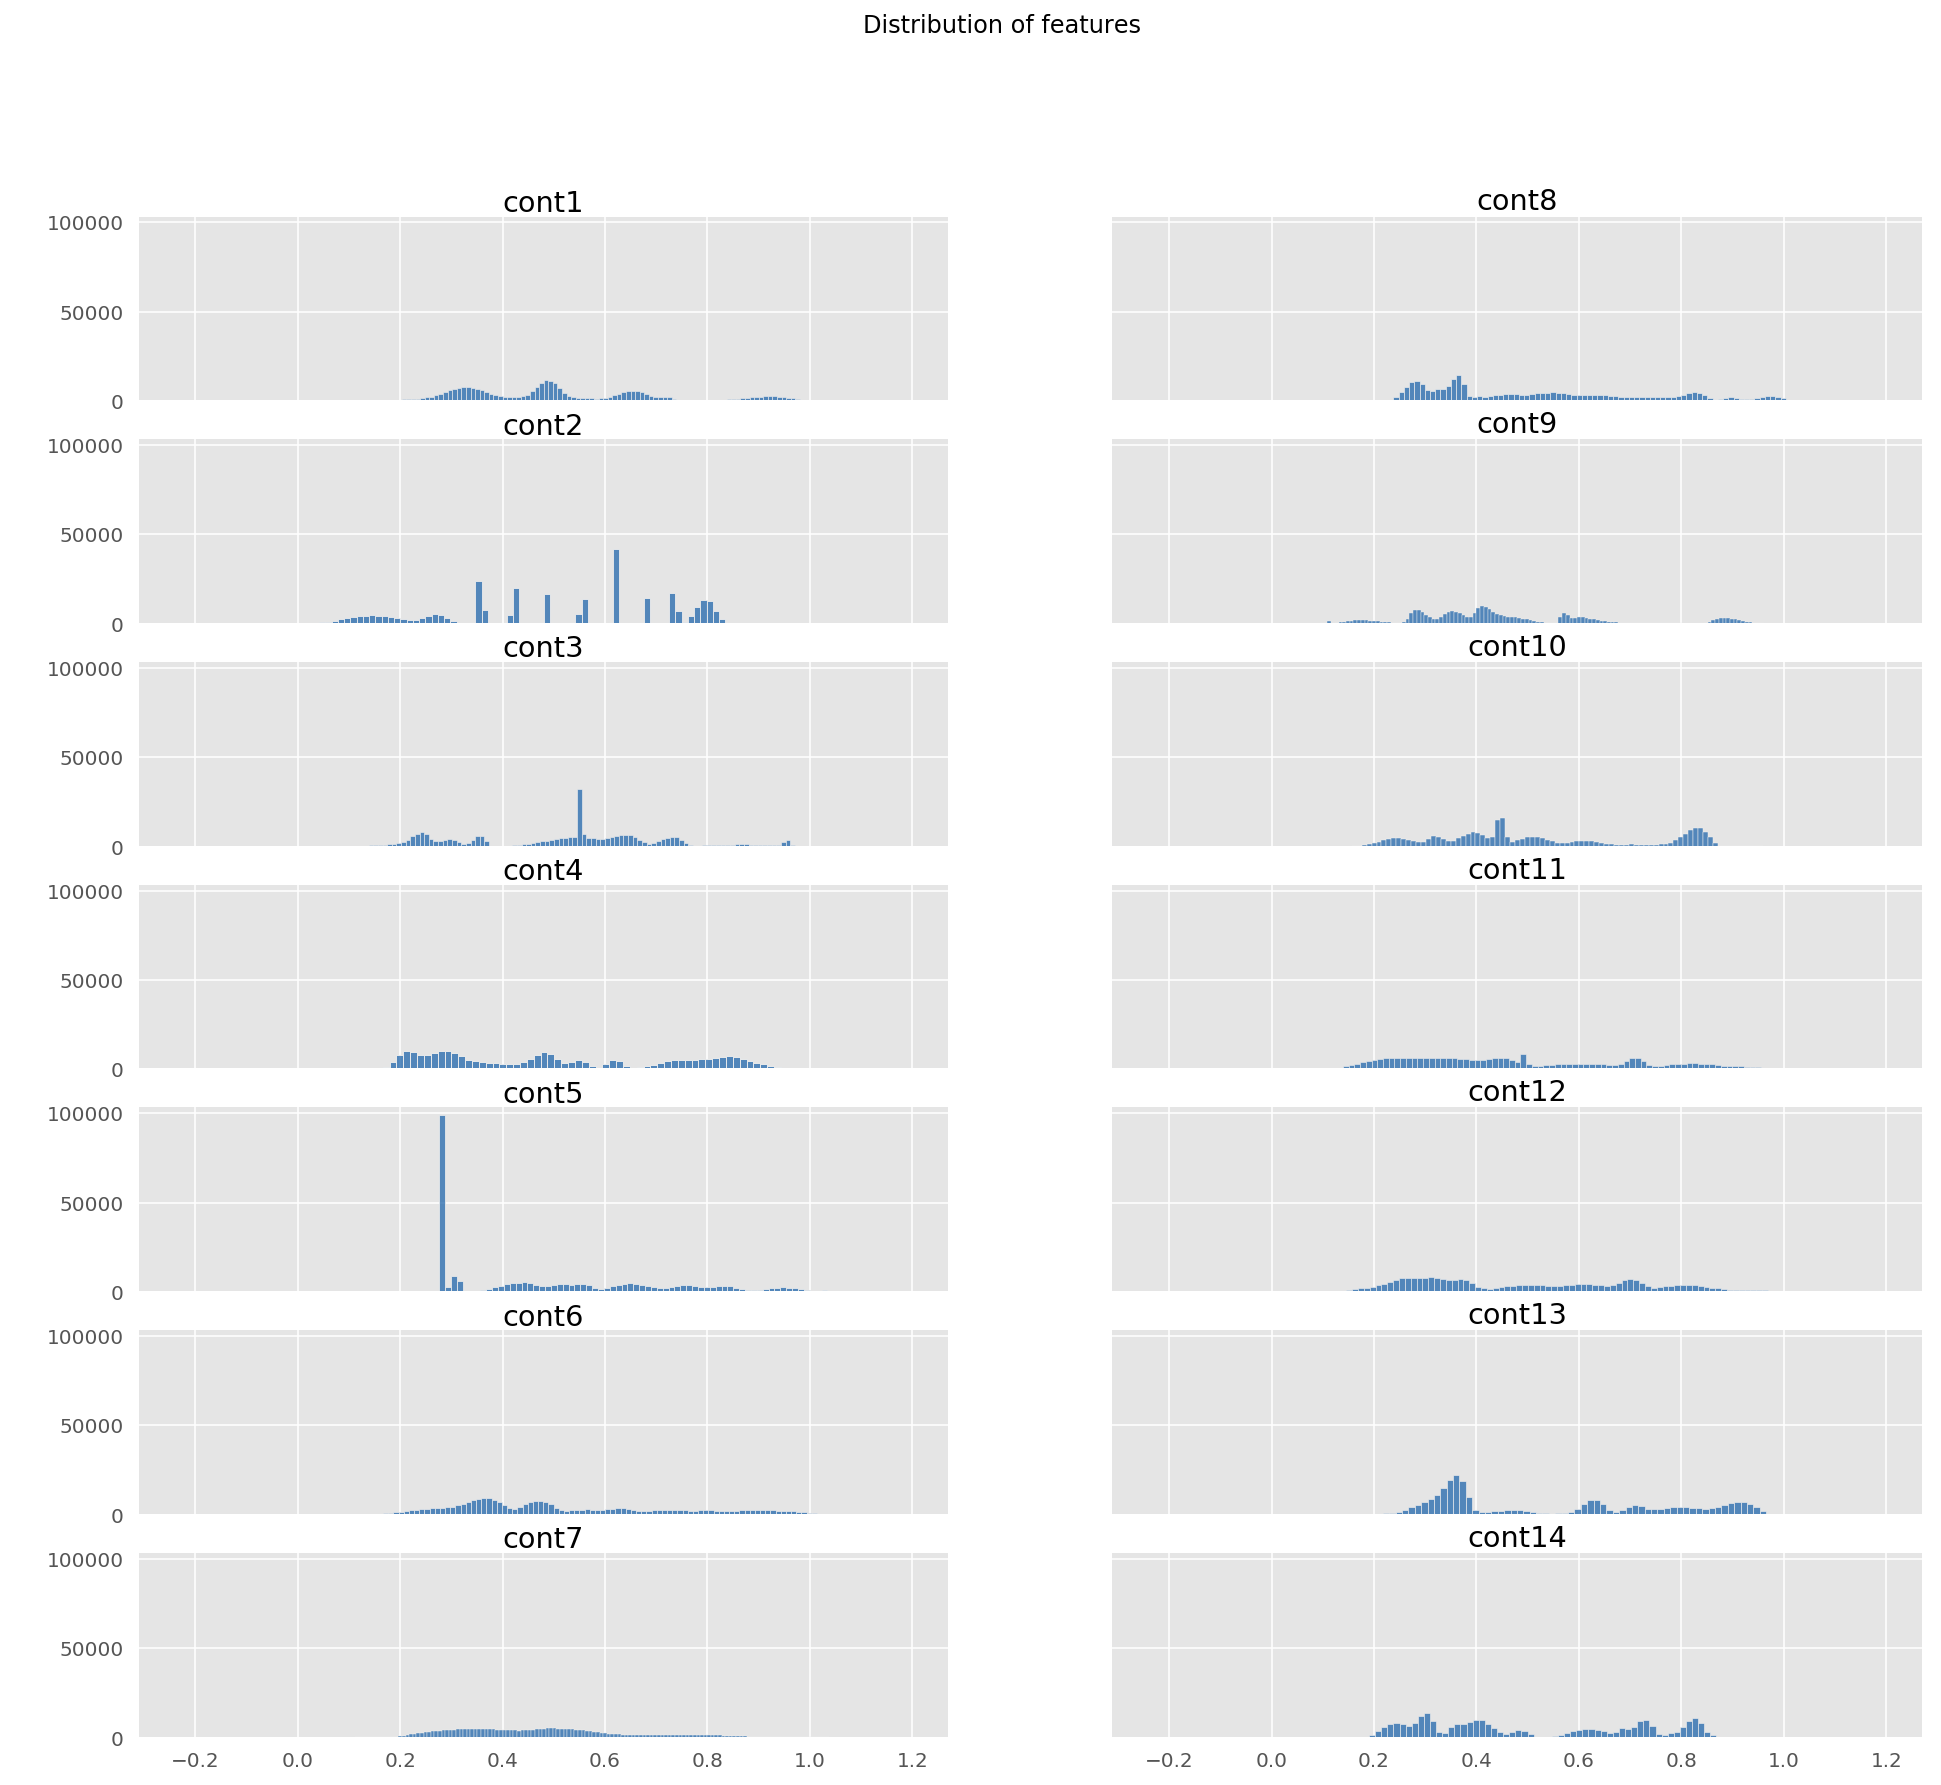

In [240]:
fig, axes = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(16,14))
fig.suptitle('Distribution of features')
plt.subplots_adjust(hspace = 0.2)


n = 0
for c in train.iloc[:,:7].columns:
    sns.histplot(ax=axes[n, 0], data = train[c].values, color = '#2166ac')
    axes[n, 0].set_title(train.columns[n], pad = 2)
    for tic in axes[n, 0].xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in axes[n, 0].yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    n+=1
    
k = 0
for c in train.iloc[:,7:14].columns:
    sns.histplot(ax=axes[k, 1], data = train[c].values, color = '#2166ac')
    axes[k, 1].set_title(train.columns[k + 7], pad = 2.8)
    for tic in axes[k, 1].xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in axes[k, 1].yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    k+=1

for a in axes.flat:
    a.set(ylabel=' ')

Некоторые из распределений сильно отличаются от большинства - cont2, cont3, cont5. Они смещают общую для всех графиков шкалу Y, поэтому их придётся отделить, чтобы увидеть распределения с меньшими пиками.

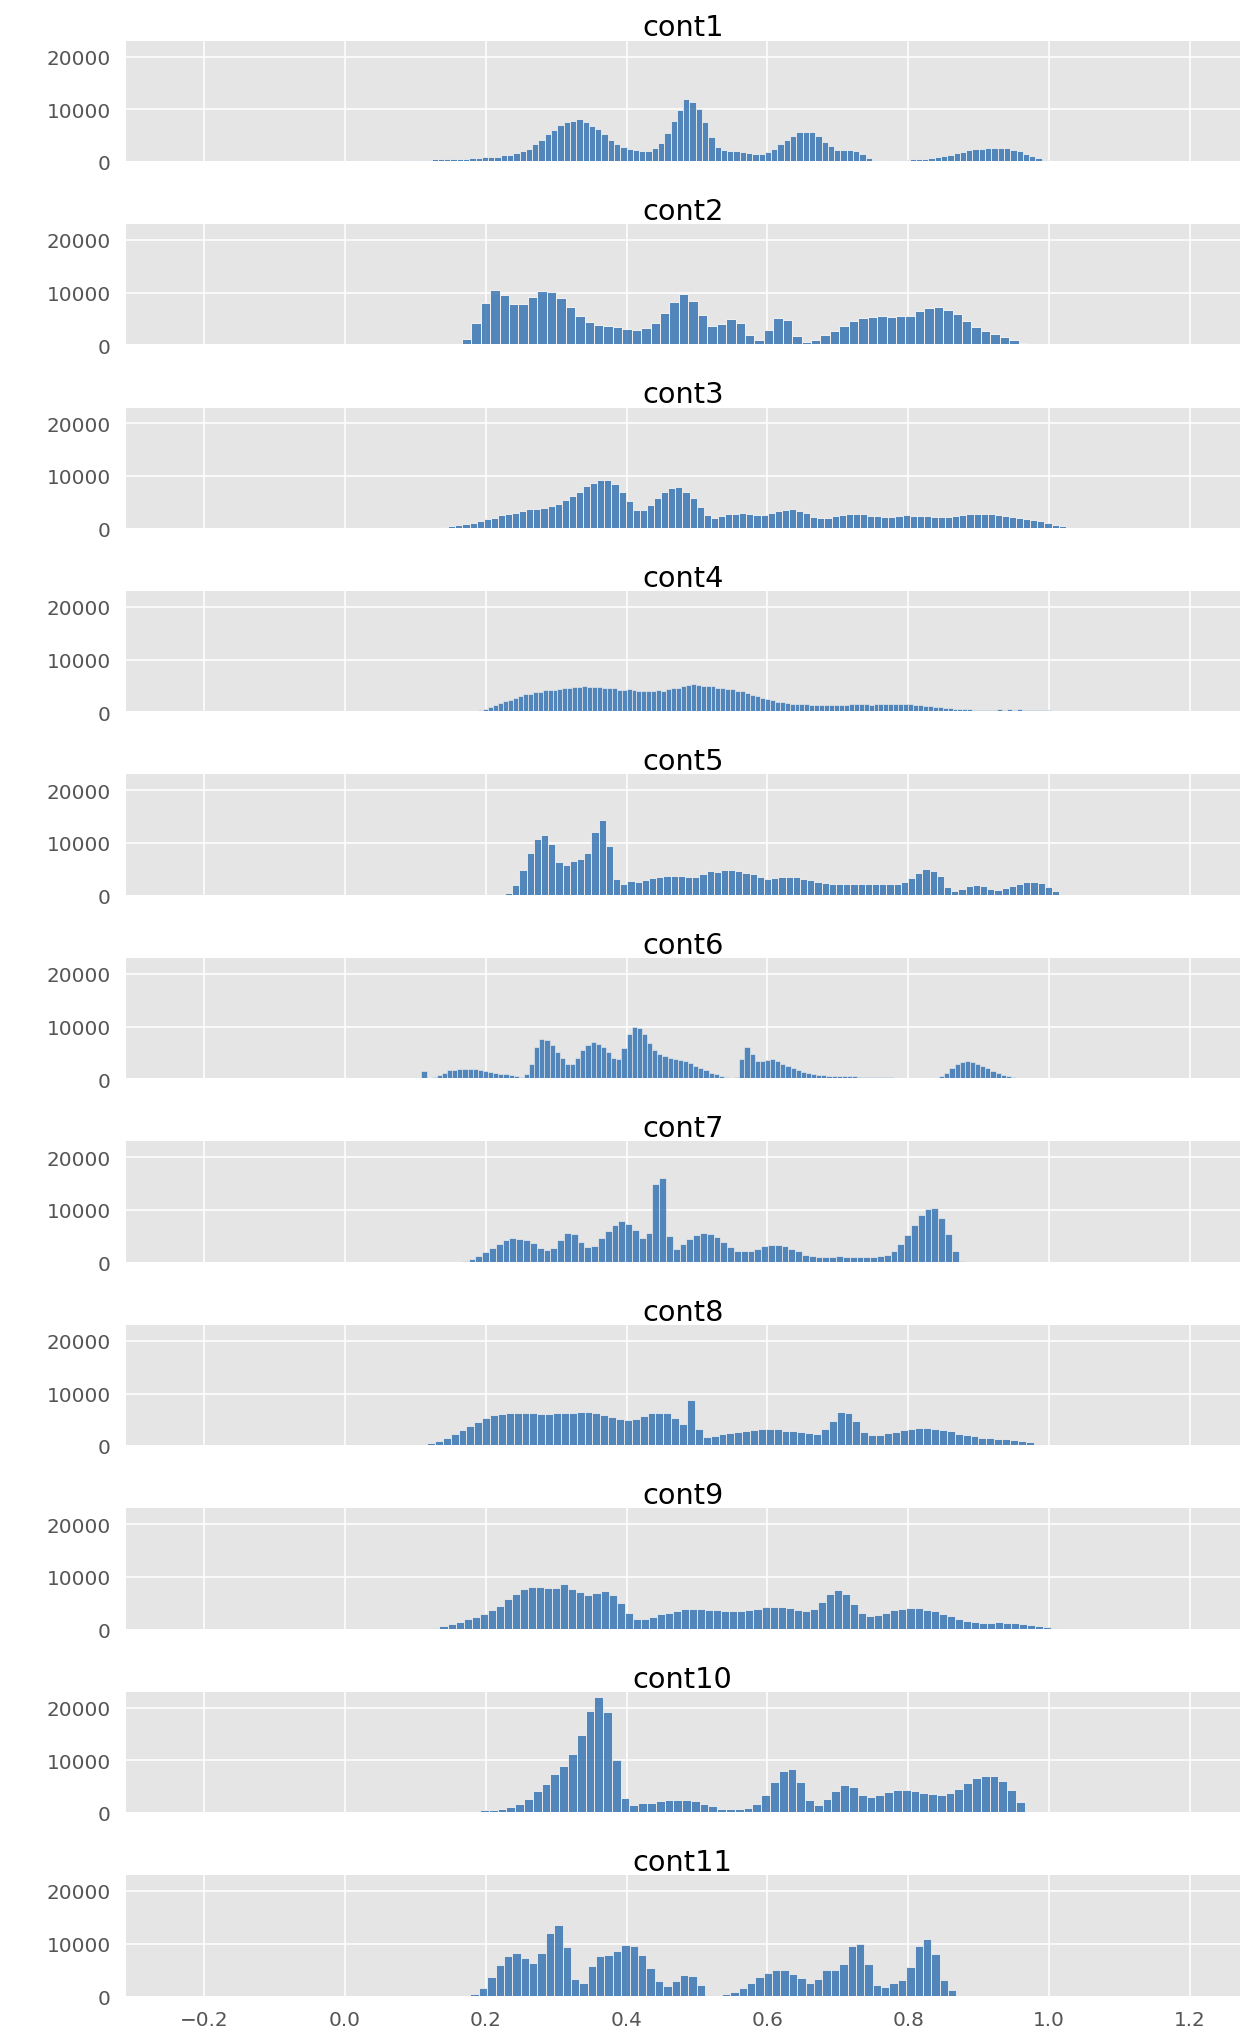

In [222]:
fig, axes = plt.subplots(11, 1, sharex=True, sharey=True, figsize=(10,18))
plt.subplots_adjust(hspace = 0.5)
n = 0
for c in [train.columns[0], train.columns[3]] + train.columns[5:14].tolist():
    sns.histplot(ax=axes[n], data = train[c].values, color = '#2166ac')
    axes[n].set_title(train.columns[n], pad = 2)
    for tic in axes[n].xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in axes[n].yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    n+=1
for a in axes.flat:
    a.set(ylabel=' ')

Посмотрим на оставшиеся распределения отдельно

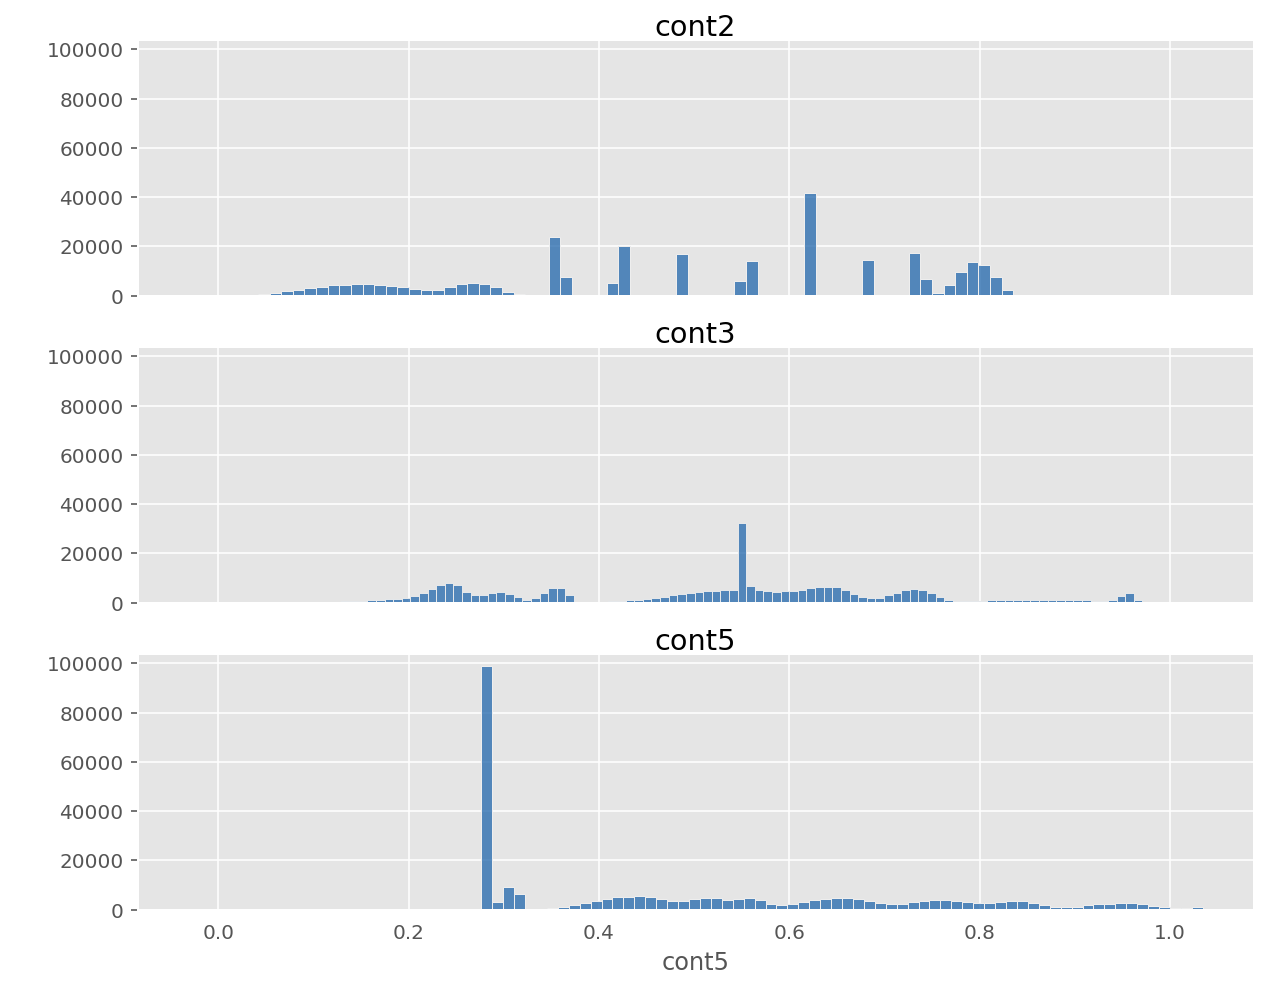

In [228]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10,8))
sns.histplot(ax=axes[0], data = train.iloc[:,1], color = '#2166ac')
for tic in axes[0].xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
lab2 = axes[0].set_title(train.columns[1], pad = 2)
# axes[0].set_facecolor('whitesmoke')
sns.histplot(ax=axes[1], data = train.iloc[:,2], color = '#2166ac')
for tic in axes[1].xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
lab3 = axes[1].set_title(train.columns[2], pad = 2)
# axes[1].set_facecolor('whitesmoke')
sns.histplot(ax=axes[2], data = train.iloc[:,4], color = '#2166ac')
for tic in axes[2].xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
lab5 = axes[2].set_title(train.columns[4], pad = 2)

for a in axes.flat:
    a.set(ylabel=' ')

Посмотрим на выбросы. Target исключен, у него слишком далёкая медиана

In [11]:
sorted_index = train.iloc[:,:14].median().sort_values(ascending=False).index
train_sorted=train[sorted_index]

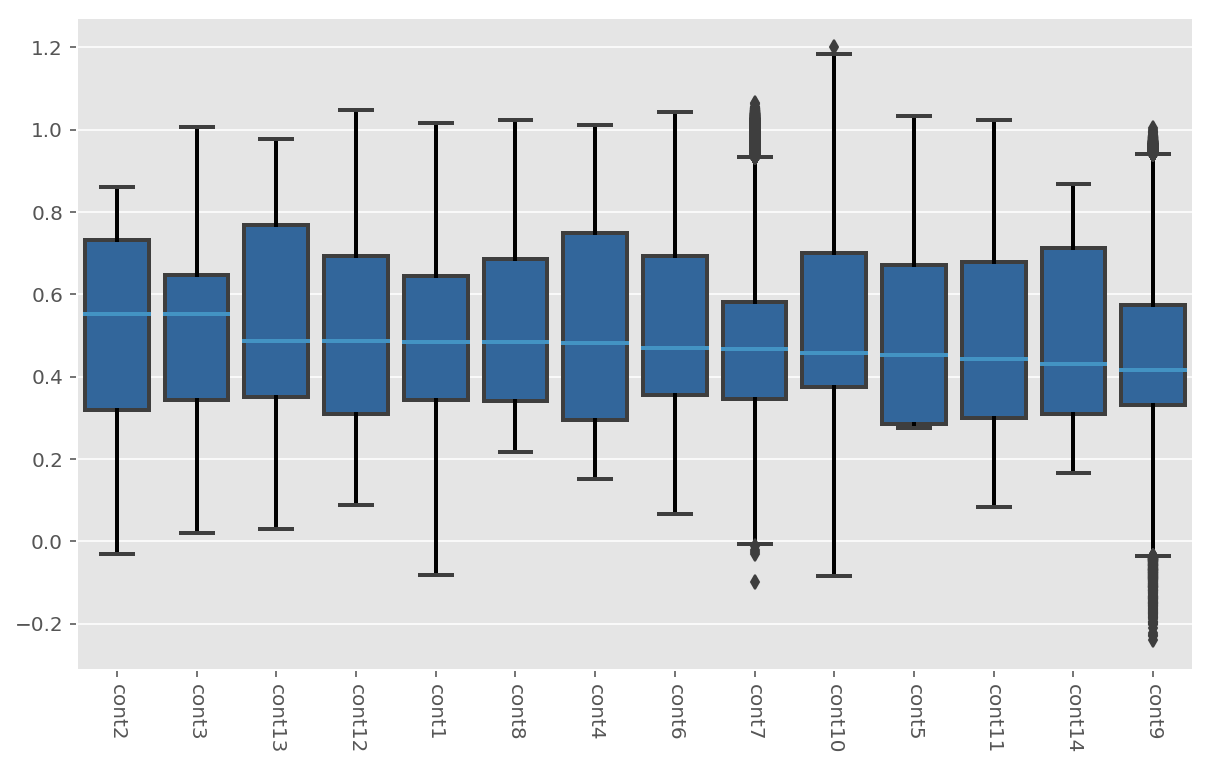

In [238]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=train_sorted, color = '#2166ac', linewidth = 2, whiskerprops=dict(color="black"), medianprops={'color':'#4393c3'})
lab = ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)
# ax.set_facecolor('whitesmoke')